In [108]:
# Importando as  bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [109]:
#URLs para referência
url_clientes = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/zoop_clientes.csv"

url_vendas = "https://raw.githubusercontent.com/alura-cursos/ia-datascience-dataviz/main/dados/zoop_vendas.csv"

In [110]:
# Lendo o CSV de clientes
clientes = pd.read_csv(url_clientes)

# Visualizando as primeiras linhas do DataFrame
clientes.head()

,ID_compra,ID_cliente,cidade,uf,regiao,idade,sexo_biologico,cashback,avaliacao_compra
0,904,8972,Natal,Rio Grande do Norte,Nordeste,49,Masculino,Não,9
1,4613,5120,São Paulo,São Paulo,Sudeste,49,Feminino,Não,9
2,5579,1847,São Paulo,São Paulo,Sudeste,24,Feminino,Não,8
3,2405,2846,São Paulo,São Paulo,Sudeste,38,Feminino,Sim,7
4,2485,2715,Salvador,Bahia,Nordeste,30,Feminino,Não,10


In [111]:
#lendo CSV vendas
vendas = pd.read_csv(url_vendas)

vendas.head()

,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento
0,6,2023-01-03,20:40,Eletrônicos,4457.9,4,713.26,Boleto
1,5,2023-01-03,21:48,Ferramentas e construção,115.9,1,0.00,PIX
2,9,2023-01-03,17:08,Beleza e cuidados pessoais,68.9,2,13.78,Cartão de Crédito
3,4,2023-01-03,14:29,Ferramentas e construção,80.9,5,40.45,PIX
4,8,2023-01-03,18:02,Beleza e cuidados pessoais,165.0,4,0.00,PIX


In [112]:
# Obtendo informações gerais sobre o DataFrame, como tipos de dados e valores não nulos
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID_compra         6169 non-null   int64 
 1   ID_cliente        6169 non-null   int64 
 2   cidade            6169 non-null   object
 3   uf                6169 non-null   object
 4   regiao            6169 non-null   object
 5   idade             6169 non-null   int64 
 6   sexo_biologico    6169 non-null   object
 7   cashback          6169 non-null   object
 8   avaliacao_compra  6169 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 433.9+ KB


In [113]:
# Estatísticas descritivas para variáveis numéricas
clientes.describe()

,ID_compra,ID_cliente,idade,avaliacao_compra
count,6169.000000,6169.000000,6169.000000,6169.000000
mean,3085.000000,5461.475280,38.260010,8.443670
std,1780.981237,2610.959977,9.838951,1.730584
min,1.000000,1005.000000,18.000000,0.000000
25%,1543.000000,3148.000000,31.000000,8.000000
50%,3085.000000,5436.000000,38.000000,9.000000
75%,4627.000000,7748.000000,45.000000,9.000000
max,6169.000000,9999.000000,70.000000,10.000000


In [114]:
# Contagem de clientes por sexo
clientes['sexo_biologico'].value_counts()

sexo_biologico
Feminino     3371
Masculino    2798
Name: count, dtype: int64

In [115]:
# Média de idade dos clientes
clientes['idade'].mean()

38.2600097260496

In [116]:
# Contagem de clientes por região
clientes['regiao'].value_counts()

regiao
Sudeste         2666
Nordeste        1882
Sul              819
Centro-Oeste     495
Norte            307
Name: count, dtype: int64

In [117]:
# Avaliação média das compras
clientes['avaliacao_compra'].mean()

8.44366996271681

In [118]:
# Verificando a participação no programa de cashback
clientes['cashback'].value_counts()

cashback
Não    3557
Sim    2612
Name: count, dtype: int64

In [119]:
# Obtendo informações gerais sobre o DataFrame, como tipos de dados e valores não nulos
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6169 entries, 0 to 6168
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_compra         6169 non-null   int64  
 1   data              6169 non-null   object 
 2   horario           6169 non-null   object 
 3   categoria         6169 non-null   object 
 4   preco_unitario    6169 non-null   float64
 5   quantidade        6169 non-null   int64  
 6   frete             6169 non-null   float64
 7   metodo_pagamento  6169 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 385.7+ KB


In [120]:
#transformando a data de object para datetime64
vendas["data"] = pd.to_datetime(vendas["data"], format="%Y-%m-%d")

In [121]:
# Obtendo infor# Estatísticas descritivas para variáveis numéricas
vendas.describe()

,ID_compra,data,preco_unitario,quantidade,frete
count,6169.000000,6169,6169.000000,6169.000000,6169.000000
mean,3085.000000,2023-08-20 00:12:22.292105984,873.234738,3.004863,119.233832
min,1.000000,2023-01-03 00:00:00,2.900000,1.000000,0.000000
25%,1543.000000,2023-05-30 00:00:00,44.900000,2.000000,0.320000
50%,3085.000000,2023-08-31 00:00:00,93.900000,3.000000,7.550000
75%,4627.000000,2023-11-23 00:00:00,221.900000,4.000000,29.240000
max,6169.000000,2023-12-31 00:00:00,8000.000000,5.000000,4521.540000
std,1780.981237,NaN,1852.064342,1.420725,366.149225


In [122]:
# Contagem de vendas por categoria de produto
vendas['categoria'].value_counts()

categoria
Alimentos e bebidas           1495
Beleza e cuidados pessoais    1062
Casa e limpeza                1041
Eletrodomésticos               665
Eletrônicos                    580
Papelaria e escritório         551
Ferramentas e construção       474
Livros                         301
Name: count, dtype: int64

In [123]:
# Preço médio unitário dos produtos
vendas['preco_unitario'].mean()

873.2347382071648

In [124]:
# Quantidade total de produtos vendidos
vendas['quantidade'].sum()

18537

In [125]:
# Valor total do frete arrecadado
vendas['frete'].sum()

735553.51

In [126]:
# Métodos de pagamento utilizados e suas frequências
vendas['metodo_pagamento'].value_counts()

metodo_pagamento
Cartão de Crédito    2851
PIX                  2244
Cartão de Débito      547
Boleto                527
Name: count, dtype: int64

In [127]:
# Unindo as duas bases de dados "clientes" e "vendas"
# Como as duas bases de dados possuem a coluna "ID_compra", faremos essa junção por meio dessa coluna
df = pd.merge(vendas, clientes, on='ID_compra')

In [128]:
# Organizando as colunas na sequência desejada
colunas_organizadas = [
    "ID_compra", "data", "horario", "categoria", "preco_unitario",
    "quantidade", "frete", "metodo_pagamento", "ID_cliente", "idade",
    "sexo_biologico", "cidade", "uf", "regiao", "cashback", "avaliacao_compra"
]
df = df[colunas_organizadas]

In [129]:
#verificação do DataFrame
df.head()

,ID_compra,data,horario,categoria,preco_unitario,quantidade,frete,metodo_pagamento,ID_cliente,idade,sexo_biologico,cidade,uf,regiao,cashback,avaliacao_compra
0,6,2023-01-03,20:40,Eletrônicos,4457.9,4,713.26,Boleto,6149,30,Masculino,Porto Alegre,Rio Grande do Sul,Sul,Sim,10
1,5,2023-01-03,21:48,Ferramentas e construção,115.9,1,0.00,PIX,9491,36,Masculino,São Paulo,São Paulo,Sudeste,Sim,8
2,9,2023-01-03,17:08,Beleza e cuidados pessoais,68.9,2,13.78,Cartão de Crédito,5288,39,Feminino,Porto Velho,Rondônia,Norte,Não,7
3,4,2023-01-03,14:29,Ferramentas e construção,80.9,5,40.45,PIX,9679,35,Masculino,Recife,Pernambuco,Nordeste,Sim,9
4,8,2023-01-03,18:02,Beleza e cuidados pessoais,165.0,4,0.00,PIX,1380,50,Masculino,São Paulo,São Paulo,Sudeste,Não,9


Tabela 'metodos_de_pagamento':
  Metodo de Pagamento  Quantidade
0   Cartão de Crédito        2851
1                 PIX        2244
2    Cartão de Débito         547
3              Boleto         527


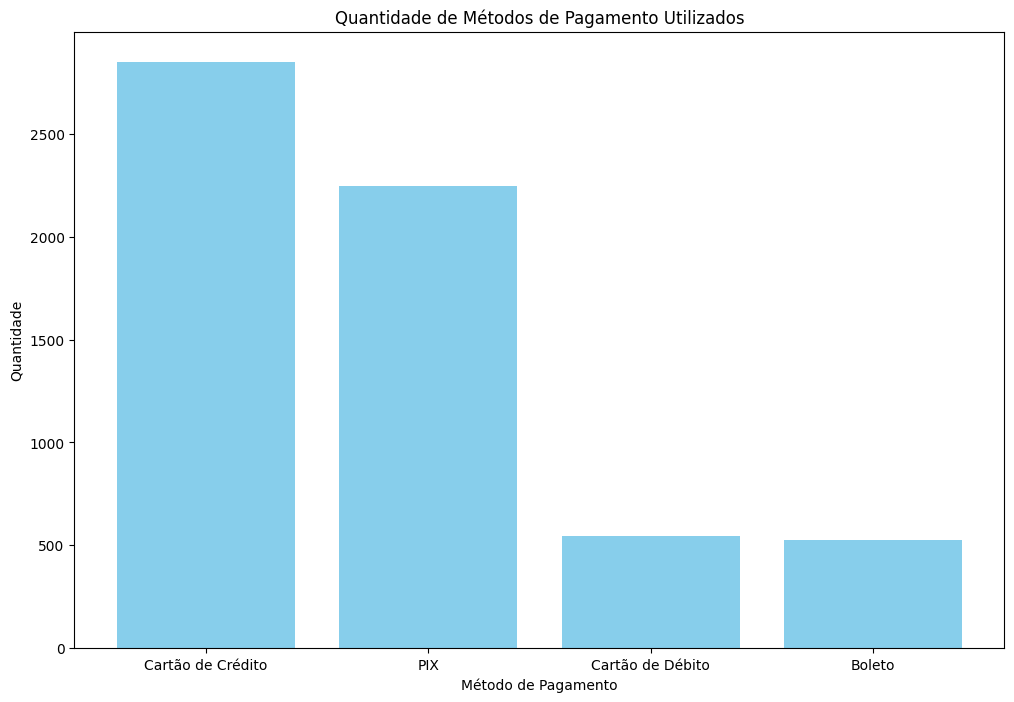

In [130]:
# Criar a tabela "metodos_de_pagamento"
metodos_de_pagamento = df['metodo_pagamento'].value_counts().reset_index()
metodos_de_pagamento.columns = ['Metodo de Pagamento', 'Quantidade']

# Visualização
plt.figure(figsize=(12, 8))
plt.bar(metodos_de_pagamento['Metodo de Pagamento'], metodos_de_pagamento['Quantidade'], color='skyblue')
plt.title('Quantidade de Métodos de Pagamento Utilizados')
plt.xlabel('Método de Pagamento')
plt.ylabel('Quantidade')
plt.xticks(rotation=0, ha='center')

# Exibir a tabela
print("Tabela 'metodos_de_pagamento':")
print(metodos_de_pagamento)

# Exibir o gráfico
plt.show()

In [131]:
#Calculando o faturamento por categoria
df['faturamento'] = (df['preco_unitario']*df['quantidade'])+df['frete']

In [132]:
# Adicionando as cores como variáveis do projeto
VERMELHO_1,	VERMELHO_2,	VERMELHO_3 = "#e23155",	"#cc2c4e", "#b32742"
AZUL_1,	AZUL_2,	AZUL_3 = "#203f75",	"#1c3867", "#19325b"
BRANCO,	CINZA_1, CINZA_2, CINZA_3, CINZA_4,	CINZA_5 = "#ffffff", "#ebebeb",	"#d9d9d9", "#cccccc","#555655", "#231f20"
AQUA_1,	AQUA_2,	AQUA_3 = "#addcd4",	"#9fccc5", "#96bfb9"

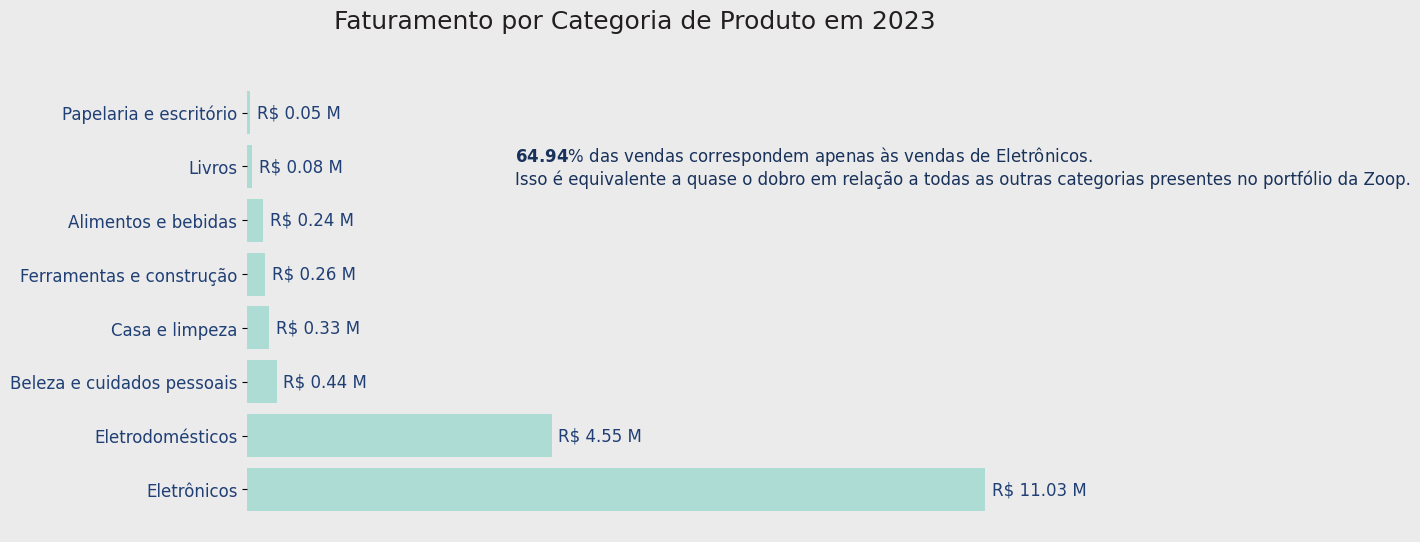

In [134]:
# Agrupar por categoria e calcular o faturamento total
faturamento_por_categoria = df.groupby('categoria')['faturamento'].sum().sort_values(ascending=False)

# Calcular percentual
total_faturamento = faturamento_por_categoria.sum()
percentual = (faturamento_por_categoria / total_faturamento) * 100

# Configurações do gráfico
plt.figure(figsize=(10, 6), facecolor=CINZA_1)
ax = plt.axes()
ax.set_facecolor(CINZA_1)
bars = plt.barh(faturamento_por_categoria.index, faturamento_por_categoria, color=AQUA_1)

# Adicionar títulos e título
plt.title('Faturamento por Categoria de Produto em 2023', fontsize=18, pad=30, color=CINZA_5)
plt.xlabel('')
plt.ylabel('')
plt.yticks(fontsize=12, color=AZUL_1)
plt.xticks([])
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)

# Adicionar total do faturamento acima de cada barra
for bar in bars:
    plt.text(bar.get_width() + 1e5, bar.get_y() + bar.get_height() / 2,
             f'R$ {(bar.get_width() / 1e6):.2f} M',
             ha='left', va='center', color=AZUL_1, fontsize=12)

# Adicionar texto dentro da área do plot
plt.text(0.4e7, 6, 
         f"$\\bf{{{percentual['Eletrônicos']:.2f}}}$% das vendas correspondem apenas às vendas de Eletrônicos.\n"
         "Isso é equivalente a quase o dobro em relação a todas as outras "
         "categorias presentes no portfólio da Zoop.",
         ha='left', va='center', color=AZUL_3, fontsize=12)


# Exibir o gráfico
plt.show()

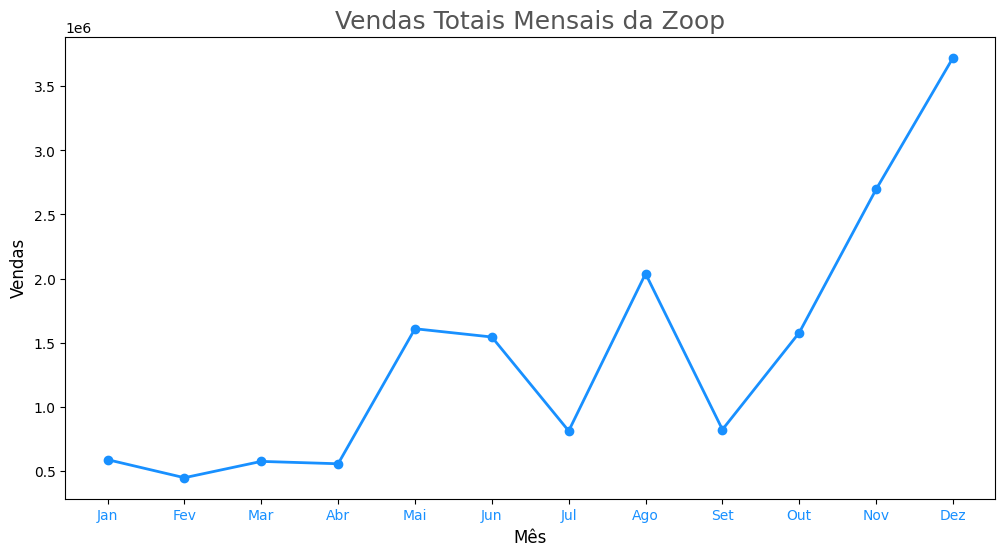

In [135]:
# Dicionário de tradução de meses
meses = {
    'January': 'Jan',
    'February': 'Fev',
    'March': 'Mar',
    'April': 'Abr',
    'May': 'Mai',
    'June': 'Jun',
    'July': 'Jul',
    'August': 'Ago',
    'September': 'Set',
    'October': 'Out',
    'November': 'Nov',
    'December': 'Dez'
}

# Agrupar por mês e calcular as vendas totais
df['mes'] = df['data'].dt.strftime('%B')
vendas_mensais = df.groupby('mes')['faturamento'].sum().reindex(meses.keys())

# Configurações do gráfico
plt.figure(figsize=(12, 6))
plt.plot(vendas_mensais.index, vendas_mensais, marker='o', color='#1890FF', linewidth=2)

# Adicionar rótulos e título
plt.title('Vendas Totais Mensais da Zoop', fontsize=18, color='#555555')
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Vendas', fontsize=12)

# Alterar rótulos do eixo x utilizando o dicionário de tradução
plt.xticks(vendas_mensais.index, [meses[mes] for mes in vendas_mensais.index], fontsize=10, color='#1890FF')

# Exibir o gráfico
plt.show()

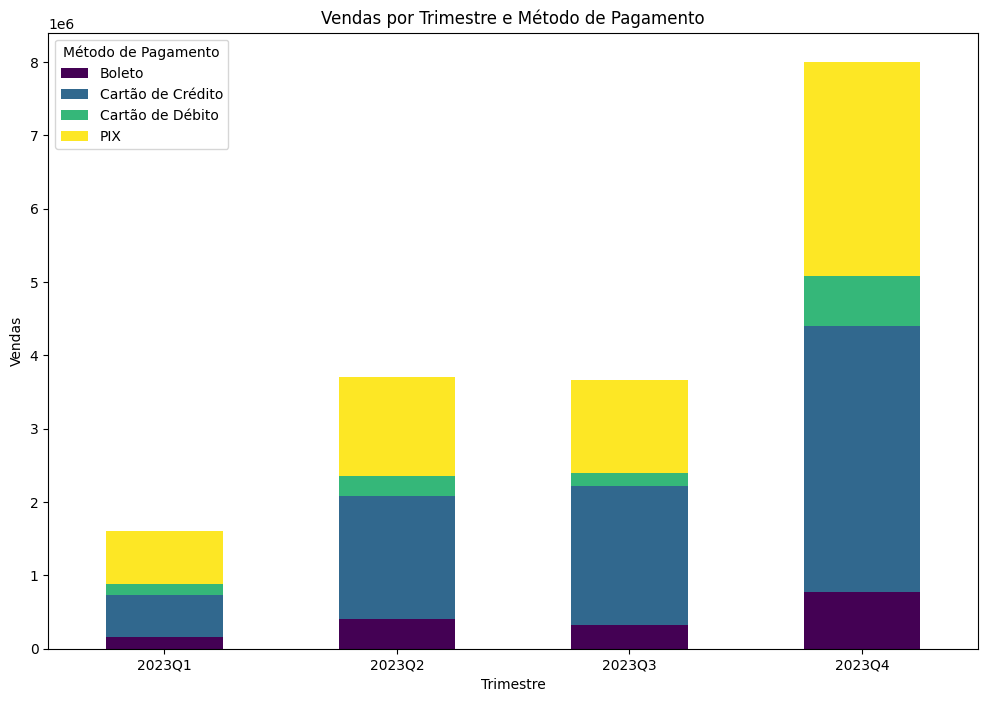

In [136]:
# Criar uma nova coluna para identificar o trimestre
df['trimestre'] = df['data'].dt.to_period('Q')

# Agrupar por trimestre e método de pagamento, somando o faturamento
vendas_por_trimestre = df.groupby(['trimestre', 'metodo_pagamento'])['faturamento'].sum().unstack()

# Visualização em gráfico de barras empilhadas
vendas_por_trimestre.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')

plt.title('Vendas por Trimestre e Método de Pagamento')
plt.xlabel('Trimestre')
plt.ylabel('Vendas')
plt.legend(title='Método de Pagamento')
plt.xticks(rotation=0, ha='center')
plt.show()

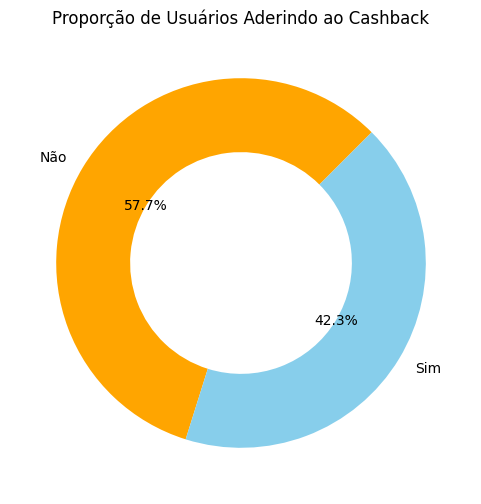

In [137]:
# Calcular a proporção de adesão ao cashback
proporcao_cashback = df['cashback'].value_counts(normalize=True)

# Cores invertidas
cores_invertidas = ['orange', 'skyblue']

# Visualização em gráfico de rosca (donut)
plt.figure(figsize=(6, 6))
plt.pie(proporcao_cashback, labels=proporcao_cashback.index, autopct='%1.1f%%', startangle=45, colors=cores_invertidas, wedgeprops=dict(width=0.4))
plt.title('Proporção de Usuários Aderindo ao Cashback')
plt.show()

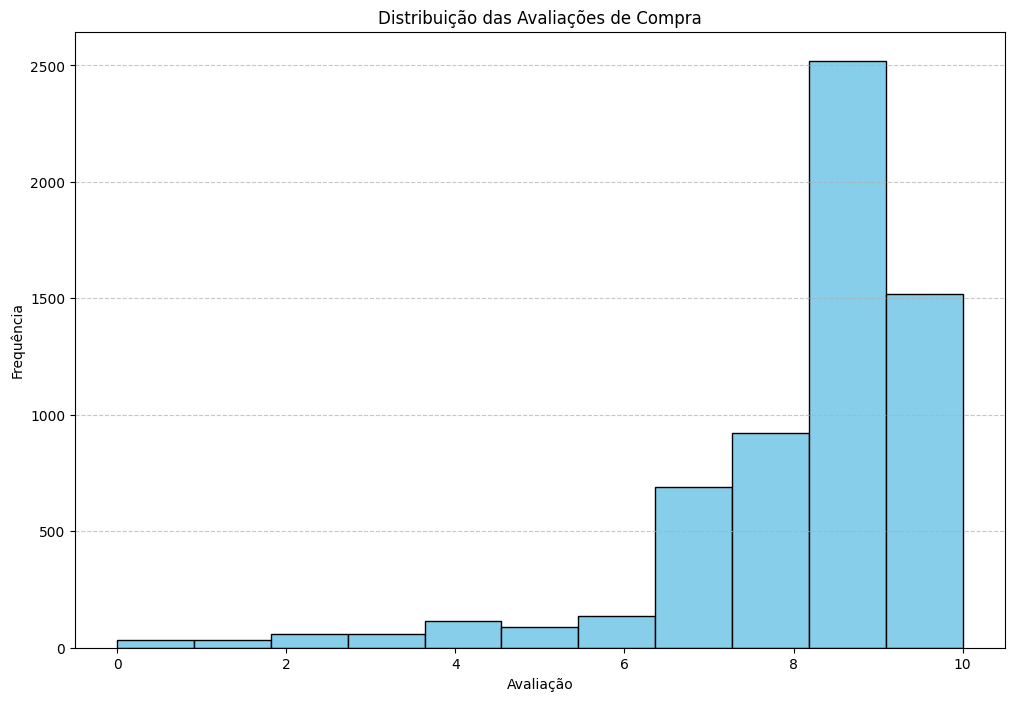

In [138]:
# Visualização em histograma
plt.figure(figsize=(12, 8))  # Cria uma figura com tamanho 12x8 polegadas
plt.hist(df['avaliacao_compra'], bins=11, edgecolor='black', color='skyblue')  # Cria o histograma
plt.title("Distribuição das Avaliações de Compra")  # Adiciona um título ao gráfico
plt.xlabel("Avaliação")  # Rotula o eixo x
plt.ylabel("Frequência")  # Rotula o eixo y
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adiciona uma grade no eixo y com linhas tracejadas e transparência
plt.show()  # Exibe o gráfico

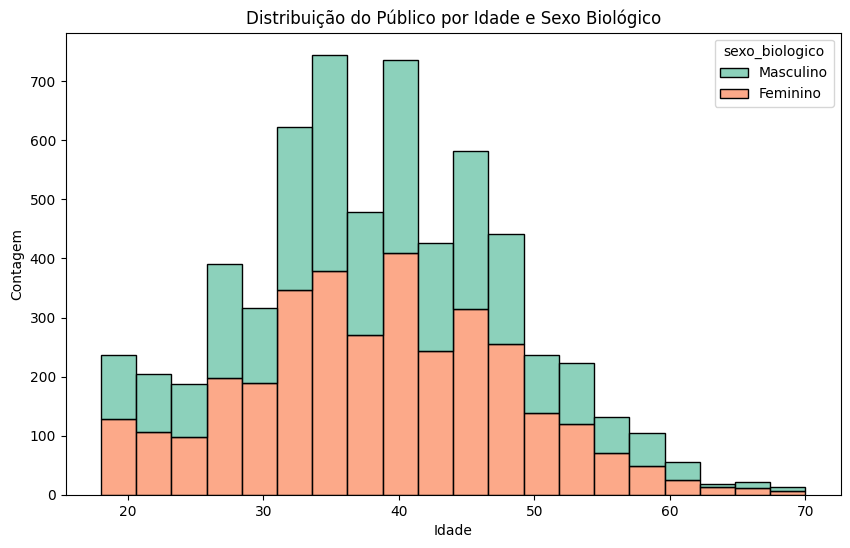

In [139]:
# Visualização em gráfico de barras empilhadas
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='idade', hue='sexo_biologico', multiple='stack', bins=20, palette='Set2', legend=True)
plt.title('Distribuição do Público por Idade e Sexo Biológico')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

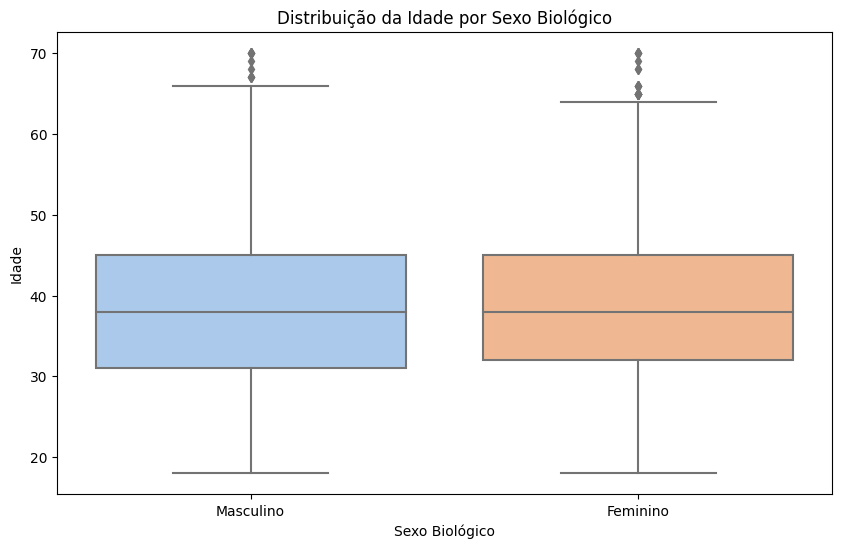

In [140]:
# Visualização em boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sexo_biologico', y='idade', palette='pastel')
plt.title('Distribuição da Idade por Sexo Biológico')
plt.xlabel('Sexo Biológico')
plt.ylabel('Idade')
plt.show()

In [142]:
# Filtrar as colunas desejadas
vendas_2023 = df[['regiao', 'uf', 'faturamento']]

# Criar o gráfico Treemap
fig = px.treemap(vendas_2023, path=['uf'], values='faturamento', color='regiao',
                color_discrete_map={'Centro-Oeste': '#0081a7',
                                   'Nordeste': '#00afb9',
                                   'Norte': '#fdfcdc',
                                   'Sudeste': '#fed9b7',
                                   'Sul': '#f07167'})

# Atualizando o layout para adicionar título
fig.update_layout(width=1400, height=600, title='Faturamento Total por Região e Estado', margin=dict(t=25, l=0, r=0, b=0))

# Adicionar os valores dentro dos retângulos
fig.update_traces(textinfo='label+value')

# Exibir o gráfico
fig.show()

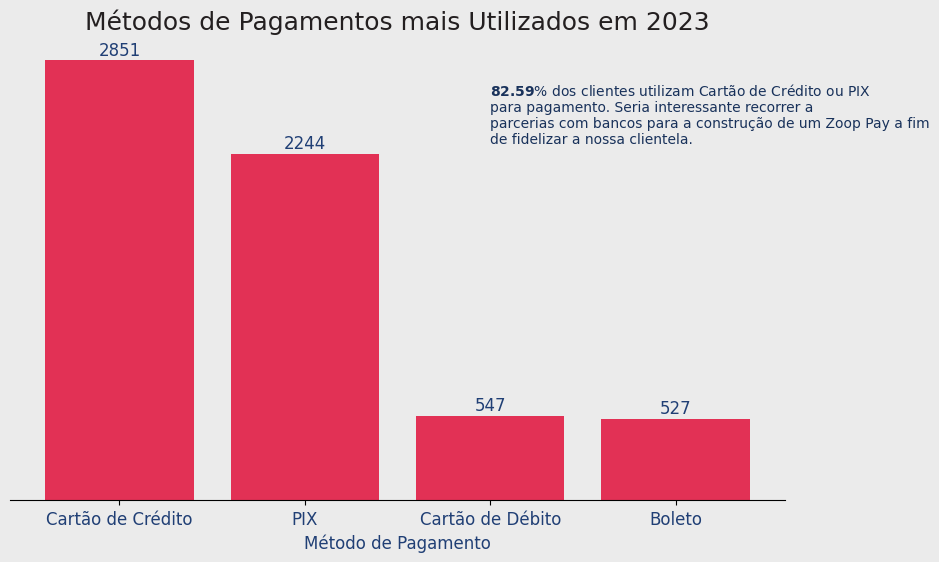

In [154]:
# Agrupar por método de pagamento e contar o total de ocorrências
metodos_de_pagamento = df['metodo_pagamento'].value_counts()

# Calcular percentual
total_clientes = metodos_de_pagamento.sum()
percentual = (metodos_de_pagamento[0] + metodos_de_pagamento[1]) / total_clientes * 100

# Configuração do gráfico
plt.figure(figsize=(10, 6), facecolor=CINZA_1)
ax = plt.axes()
ax.set_facecolor(CINZA_1)
plt.bar(metodos_de_pagamento.index, metodos_de_pagamento, color=VERMELHO_1)

# Adicionar texto com o total acima de cada barra
for i, v in enumerate(metodos_de_pagamento):
    plt.text(i, v + 8.1, str(v), ha='center', va='bottom', color=AZUL_1, fontsize=12)

# Adicionar texto dentro da área do plot
plt.text(2, 2500, f"$\\bf{percentual:.2f}$% dos clientes utilizam Cartão de Crédito ou PIX \npara pagamento. Seria interessante recorrer a \nparcerias com bancos para a construção de um Zoop Pay a fim\nde fidelizar a nossa clientela.",
        ha='left', va='center', color=AZUL_3, fontsize=10)

# Configurações adicionais
plt.title('Métodos de Pagamentos mais Utilizados em 2023', fontsize=18, color=CINZA_5)
plt.xticks(fontsize=12, color=AZUL_1)
plt.yticks([])
plt.xlabel('Método de Pagamento', fontsize=12, color=AZUL_1)
ax.spines[['top', 'right', 'left']].set_visible(False)

plt.show()

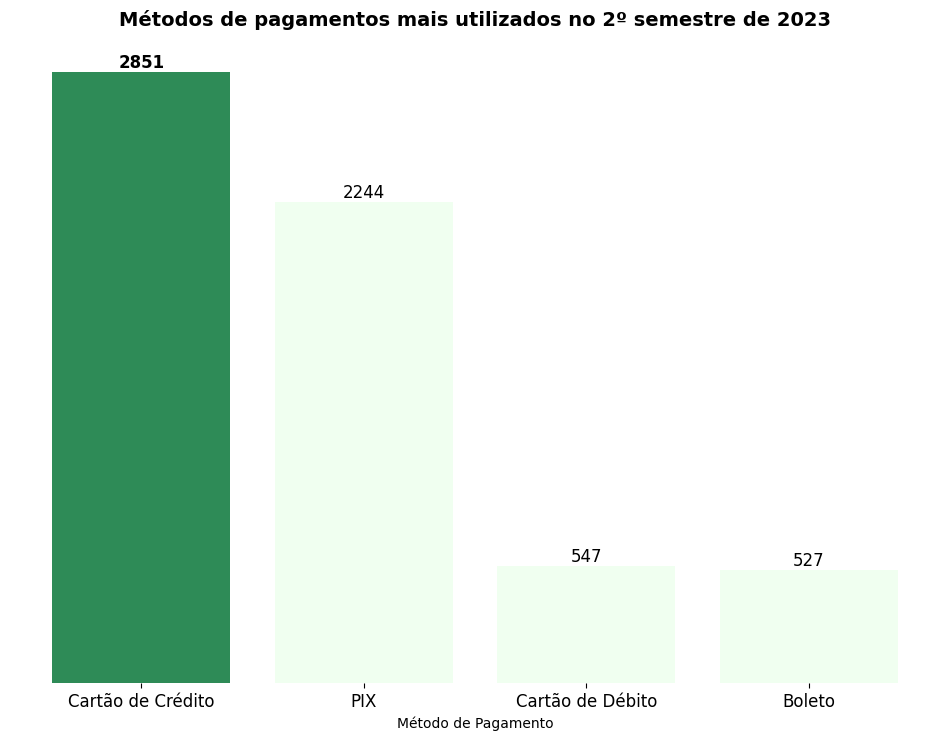

In [156]:
# Contagem dos valores dos métodos de pagamento
metodos_de_pagamento = df['metodo_pagamento'].value_counts()
# Método de pagamento mais utilizado
metodo_mais_utilizado = metodos_de_pagamento.idxmax()
# Cores para as barras
cores = ['honeydew'] * len(metodo_mais_utilizado)
cores[metodos_de_pagamento.index.get_loc(metodo_mais_utilizado)] = 'seagreen'

# Criação do gráfico
plt.figure(figsize=(12, 8))
plt.bar(metodos_de_pagamento.index, metodos_de_pagamento.values, color=cores)

# Adicionando o título antes dos valores
plt.title("Métodos de pagamentos mais utilizados no 2º semestre de 2023", fontsize=14, weight='bold', pad=30)

# Adicionando os valores diretamente sobre as barras
for i, valor in enumerate(metodos_de_pagamento.values):
    plt.text(i, valor + 20, str(valor), ha='center', fontsize=12, weight='bold' if valor == metodos_de_pagamento.max() else 'normal')

# Personalizando o gráfico
plt.xticks(fontsize=12)
plt.yticks([])
plt.ylim(0, metodos_de_pagamento.max() + 20)  # Deixar um espaço acima do maior valor
plt.xlabel("Método de Pagamento")
plt.ylabel("")
plt.gca().spines[['top', 'right', 'left', 'bottom']].set_visible(False)

# Exibindo o gráfico
plt.show()

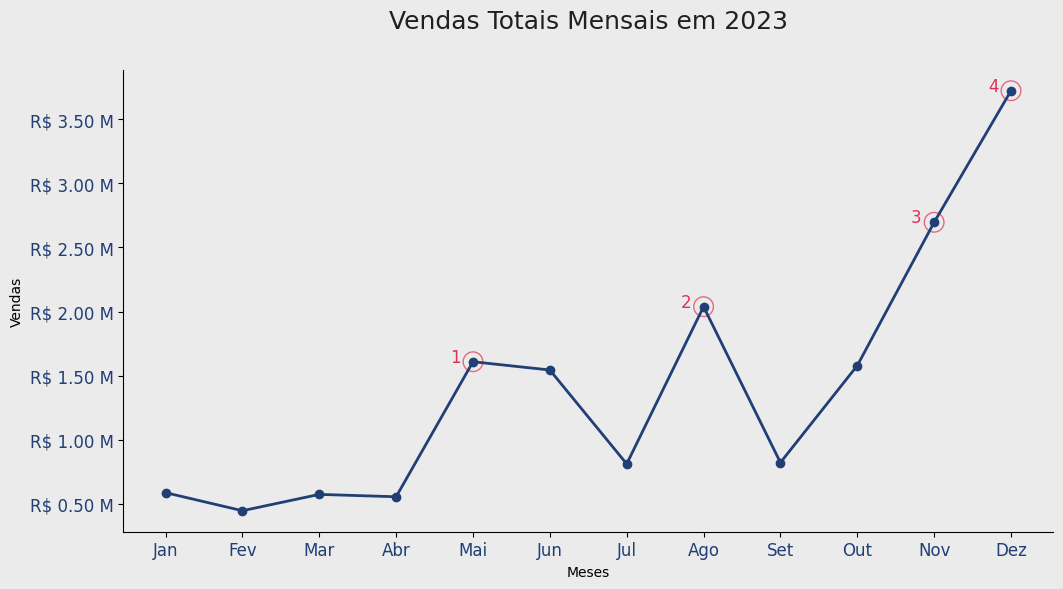

In [159]:
def vendas_mensais():
      # Dicionário de tradução de meses
      meses = {'January': 'Jan', 'February': 'Fev', 'March': 'Mar', 'April': 'Abr',
          'May': 'Mai', 'June': 'Jun', 'July': 'Jul', 'August': 'Ago',
          'September': 'Set', 'October': 'Out', 'November': 'Nov', 'December': 'Dez'}

  # Agrupar por mês e calcular as vendas totais
df['mes'] = df['data'].dt.strftime('%B')
vendas_mensais = df.groupby('mes')['faturamento'].sum().reindex(meses.keys())

  # Configurações do gráfico
plt.figure(figsize=(12, 6), facecolor=CINZA_1)
ax = plt.axes()
ax.set_facecolor(CINZA_1)
plt.plot(vendas_mensais.index, vendas_mensais, marker='o', color=AZUL_1, linewidth=2)

  # Adicionar rótulos e título
plt.title('Vendas Totais Mensais em 2023', fontsize=18, pad=30, color=CINZA_5)
plt.xlabel('Meses')
plt.ylabel('Vendas')

  # Formatando rótulos do eixo y em "R$ valor M"
formatted_yticks = ['R$ {:.2f} M'.format(val / 1e6) for val in ax.get_yticks()]
ax.set_yticks(ax.get_yticks()) # para evitar o Warning
ax.set_yticklabels(formatted_yticks, fontsize=12, color=AZUL_1)

  # Adicionar círculos numerados
for i, point in enumerate([(4, vendas_mensais.iloc[4]), (7, vendas_mensais.iloc[7]), (10, vendas_mensais.iloc[10]), (11, vendas_mensais.iloc[11])], start=1):
    plt.scatter(point[0], point[1], s=200, color='none', edgecolors=VERMELHO_1, alpha=0.7)
    plt.text(point[0] - 0.3, point[1] + 0.1, str(i), fontsize=12, color=VERMELHO_1)

  # Configurações adicionais
plt.xticks(vendas_mensais.index, [meses[mes] for mes in vendas_mensais.index], fontsize=12, color=AZUL_1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


#Exibir o gráfico
plt.show()

In [160]:
def avaliacao_compra():
    # Configurações do gráfico
    plt.figure(figsize=(10, 6), facecolor=CINZA_1)
    ax = plt.axes()
    ax.set_facecolor(CINZA_1)
    
    # Plotar o histograma das avaliações
    sns.histplot(df['avaliacao_compra'], bins=11, color=VERMELHO_1, kde=False, ax=ax)
    
    # Adicionar rótulos e título
    plt.title('Distribuição das Avaliações das Compras em 2023', fontsize=18, pad=30, 
              color=CINZA_5)
    plt.xlabel('Avaliação', fontsize=12, color=AZUL_1)
    plt.ylabel('Frequência', fontsize=12, color=AZUL_1)
    plt.xticks(range(11), fontsize=12, color=AZUL_1)
    plt.yticks(fontsize=12, color=AZUL_1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)
    
    # Adicionar caixa de anotação
    media_avaliacao = df['avaliacao_compra'].mean().round(2)
    avaliacao_mais_comum = df['avaliacao_compra'].value_counts().idxmax()
    freq_avaliacao_mais_comum = df['avaliacao_compra'].value_counts().max()
    
    texto_anotacao = f"Média de avaliações = {media_avaliacao}\nAvaliação mais comum = {avaliacao_mais_comum}\nFrequência da mais comum = {freq_avaliacao_mais_comum}"
    
    ax.annotate(texto_anotacao, xy=(9, 2250), xytext=(2, 1800), fontsize=12, color=AZUL_1,
                bbox=dict(boxstyle="round,pad=0.3", edgecolor=CINZA_3, facecolor=BRANCO),
                arrowprops=dict(facecolor=AZUL_1, arrowstyle="->", connectionstyle="arc3,rad=0.3"))
    
    return plt

<module 'matplotlib.pyplot' from 'c:\\Users\\dsadm\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\matplotlib\\pyplot.py'>

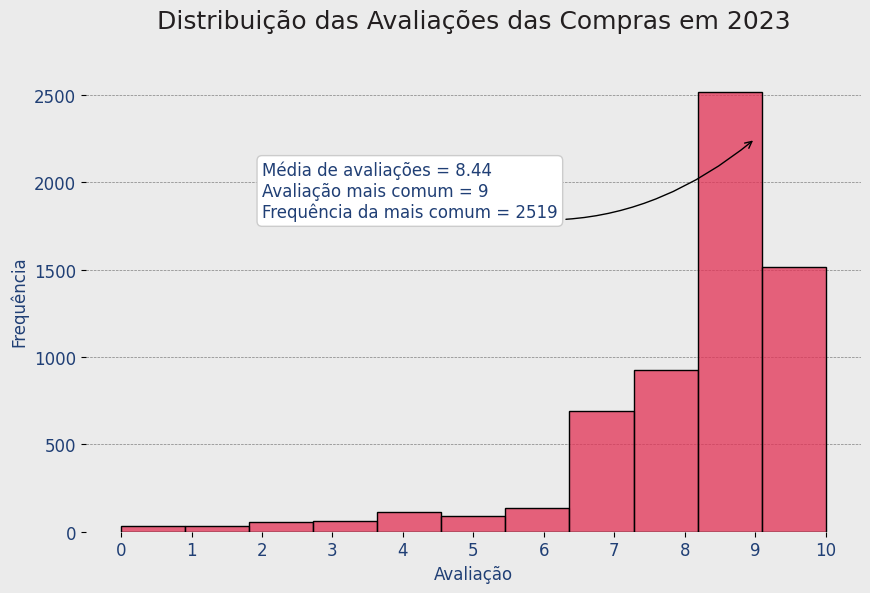

In [161]:
avaliacao_compra()

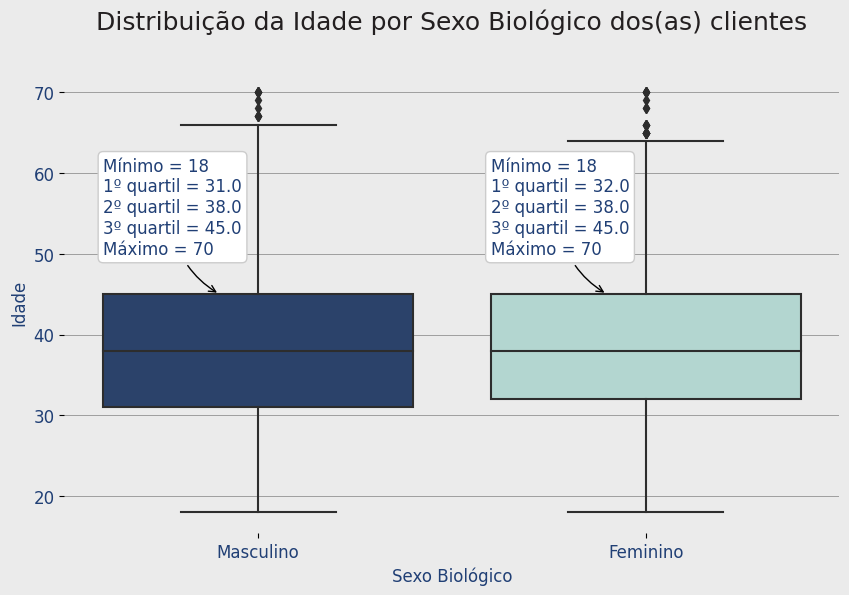

In [163]:
def dist_idade_sexo():
    # Configurações do gráfico
    plt.figure(figsize=(10, 6), facecolor=CINZA_1)
    ax = plt.axes()
    ax.set_facecolor(CINZA_1)

    # Plotar o boxplot da distribuição da idade por sexo biológico
    sns.boxplot(data=df, x='sexo_biologico', y='idade', palette=[AZUL_1, AQUA_1], ax=ax)

    # Adicionar rótulos e título
    plt.title('Distribuição da Idade por Sexo Biológico dos(as) clientes', fontsize=18, pad=30, color=CINZA_5)
    plt.xlabel('Sexo Biológico', fontsize=12, color=AZUL_1)
    plt.ylabel('Idade', fontsize=12, color=AZUL_1)
    plt.xticks(fontsize=12, color=AZUL_1)
    plt.yticks(fontsize=12, color=AZUL_1)
    ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='-', linewidth=0.5)

    # Adicionar caixas de anotação
    texto_anotacao1 = f"Mínimo = {df.groupby('sexo_biologico')['idade'].min()[1]}\n" \
                       f"1º quartil = {df.groupby('sexo_biologico')['idade'].quantile(.25)[1]}\n" \
                       f"2º quartil = {df.groupby('sexo_biologico')['idade'].median()[1]}\n" \
                       f"3º quartil = {df.groupby('sexo_biologico')['idade'].quantile(.75)[1]}\n" \
                       f"Máximo = {df.groupby('sexo_biologico')['idade'].max()[1]}"
    
    texto_anotacao2 = f"Mínimo = {df.groupby('sexo_biologico')['idade'].min()[0]}\n" \
                       f"1º quartil = {df.groupby('sexo_biologico')['idade'].quantile(.25)[0]}\n" \
                       f"2º quartil = {df.groupby('sexo_biologico')['idade'].median()[0]}\n" \
                       f"3º quartil = {df.groupby('sexo_biologico')['idade'].quantile(.75)[0]}\n" \
                       f"Máximo = {df.groupby('sexo_biologico')['idade'].max()[0]}"

    # Adiciona a primeira caixa de anotação ao gráfico
    ax.annotate(texto_anotacao1, xy=(-0.1, 45), xytext=(-0.4, 50), fontsize=12, color=AZUL_1,
                bbox=dict(boxstyle="round, pad=0.3", edgecolor=CINZA_3, facecolor=BRANCO),
                arrowprops=dict(facecolor=AZUL_1, arrowstyle="->", connectionstyle="arc3, rad=0.3"))

    # Adiciona a segunda caixa de anotação ao gráfico
    ax.annotate(texto_anotacao2, xy=(0.9, 45), xytext=(0.6, 50), fontsize=12, color=AZUL_1,
                bbox=dict(boxstyle="round, pad=0.3", edgecolor=CINZA_3, facecolor=BRANCO),
                arrowprops=dict(facecolor=AZUL_1, arrowstyle="->", connectionstyle="arc3, rad=0.3"))

    plt.show()

# Chame a função para exibir o gráfico
dist_idade_sexo()


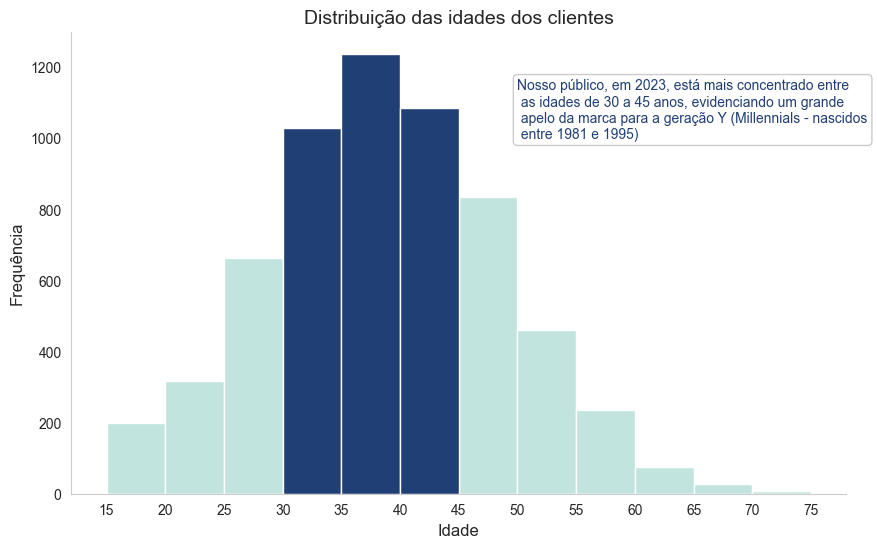

In [202]:
# Configurar o estilo do Seaborn
sns.set_style("whitegrid")

# Criar o histograma com Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='idade', bins=range(15, 76, 5), color=AQUA_1)

# Destacar as barras com idade entre 30 e 45 com a cor AZUL_1
plt.hist(df[(df['idade'] >= 30) & (df['idade'] < 45)]['idade'], bins=range(15, 76, 5), color=AZUL_1)

# Configurações do gráfico
plt.xticks(range(15, 76, 5), fontsize=10)
plt.grid(False)
plt.gca().spines[['top', 'right']].set_visible(False)

# Adicionar anotação
plt.annotate("Nosso público, em 2023, está mais concentrado entre \n as idades de 30 a 45 anos, evidenciando um grande \n apelo da marca para a geração Y (Millennials - nascidos\n entre 1981 e 1995)", 
              xy=(50, 1000), xytext=(50, 1000), fontsize=10, backgroundcolor = BRANCO, color=AZUL_1, 
              bbox=dict(facecolor=BRANCO, edgecolor=CINZA_3, boxstyle='round'), arrowprops=dict(arrowstyle='-'))

# Adicionar rótulos e título
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title('Distribuição das idades dos clientes', fontsize=14)
plt.savefig('Grafico ex.jpg')

# Exibir o histograma
plt.show()
